## Car Price Prediction

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [43]:
df = pd.read_csv('CarPrice.csv')

In [44]:
df.shape

(205, 26)

In [45]:
df.head()


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [47]:
## Feature Engineering


In [48]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [49]:
df.drop('car_ID',axis=1,inplace=True)

In [50]:
df.shape

(205, 25)

In [118]:
df.columns

Index(['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [119]:
object_columns = df.select_dtypes(include=['object']).columns
numeric_columns = df.select_dtypes(exclude=['object']).columns

In [120]:
discret_fea = [fea for fea in numeric_columns if len(df[fea].unique())<25 and fea not in ['price']]
contin_fea = [fea for fea in numeric_columns if fea not in discret_fea and fea not in ['price']]

In [121]:
print(discret_fea,contin_fea)

['symboling', 'peakrpm'] ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'citympg', 'highwaympg']


In [122]:
from sklearn.model_selection import train_test_split
X = df.drop('price',axis=1)
y = df['price']

In [123]:
X.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22


In [124]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
scaler = StandardScaler()

In [125]:
for col in object_columns:
    X[col] = le.fit_transform(X[col])
    y = le.fit_transform(y)


In [126]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [147]:
y_train

array([155, 130,  26,  39,  70,  10,  29, 144, 114,  11, 140,  30,  68,
        36, 128,  60, 104, 185,   4,  71, 147,  99, 138,  92,  25, 163,
        34, 166,  90,  27, 153,  40,   8, 142,  77, 113, 111,  19,  49,
        41, 158, 143, 153, 137,   9,  96,  41, 179,  28,   0,  34, 146,
        91,  13, 129, 121,  16, 145, 160,  54, 150,  63, 178, 134,  31,
       148,   5, 109,  76, 141,  53, 136,  88,   7,   3,  97, 118,  51,
        50, 176, 167,  98,  66,  75,  67,  89, 115,  67,  49,  64, 102,
        62,  65, 149, 177,  35,  48,  22,  44, 123, 162,  21, 107,  56,
        59,  83, 183,  81,  32, 159, 122,  18, 126, 133,  61,   6, 169,
       164,  65,  94,  80, 184, 181, 132, 127, 101, 157,  93,  37, 106,
         2, 161,  85, 131, 182,  73,   7, 120,  43, 139, 175,  47,  33,
       108, 137,  23, 103,  74,  12, 119,  69, 152,  73, 188,  20, 168,
        17,  86, 180, 156, 170,  24, 135, 124])

In [171]:
# select a random row from the dataframe
row = X_train.sample(1)
# select data as coma separated values
data = row.values[0]
data

array([-1.000e+00,  2.200e+01,  0.000e+00,  1.000e+00,  0.000e+00,
        3.000e+00,  2.000e+00,  0.000e+00,  1.156e+02,  2.026e+02,
        7.170e+01,  5.630e+01,  3.770e+03,  3.000e+00,  1.000e+00,
        1.830e+02,  3.000e+00,  3.580e+00,  3.640e+00,  2.150e+01,
        1.230e+02,  4.350e+03,  2.200e+01,  2.500e+01])

In [165]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)

RandomForestRegressor()

In [166]:
rfr.score(X_test,y_test)*100

92.18322260689241

In [167]:
y_pred = rfr.predict(X_test)

In [172]:
rfr.predict([data])

array([164.47])

In [73]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score,accuracy_score,confusion_matrix
print('Mean Squared Error:',mean_squared_error(y_test,y_pred))
print('Mean Absolute Error:',mean_absolute_error(y_test,y_pred))
print('R2 Score:',r2_score(y_test,y_pred)*100)


Mean Squared Error: 235.1581707317073
Mean Absolute Error: 12.041463414634144
R2 Score: 91.5698890460838


In [90]:
X = df.drop('price',axis=1)
y = df['price']
X.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22


In [91]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

In [92]:
le = LabelEncoder()
oh = OneHotEncoder(drop='first')
scaler = StandardScaler()


In [93]:
numeric_columns = X.select_dtypes(exclude=['object']).columns
object_columns = X.select_dtypes(include=['object']).columns


In [94]:
ct = ColumnTransformer(transformers=[
    ('encoder',oh,object_columns),
    ('scaler',scaler,numeric_columns)],remainder='passthrough')
    

In [95]:
X = ct.fit_transform(X)


In [88]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [99]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((164, 189), (41, 189), (164,), (41,))

In [100]:
rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)

RandomForestRegressor()

In [101]:
rfr.score(X_test,y_test)*100

95.57045228726851

In [102]:
y_pred = rfr.predict(X_test)

In [103]:
# plot

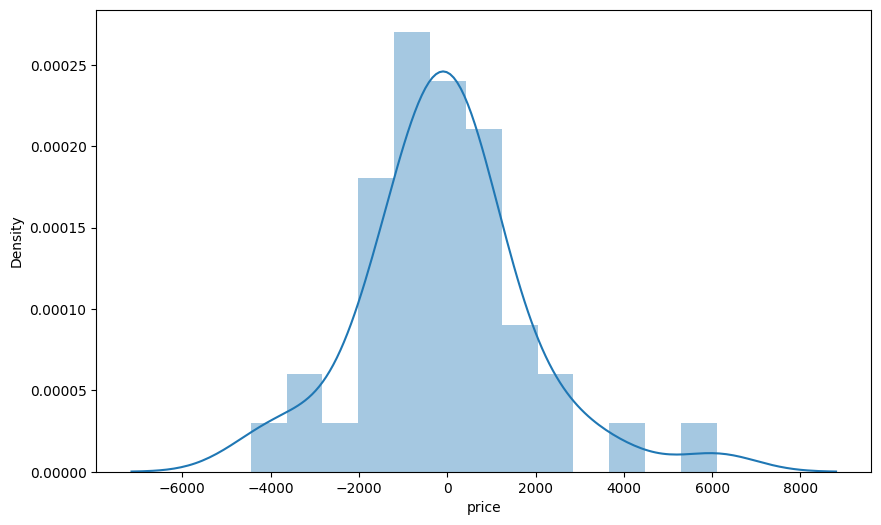

In [105]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(10,6))
sns.distplot(y_test-y_pred)
plt.show()

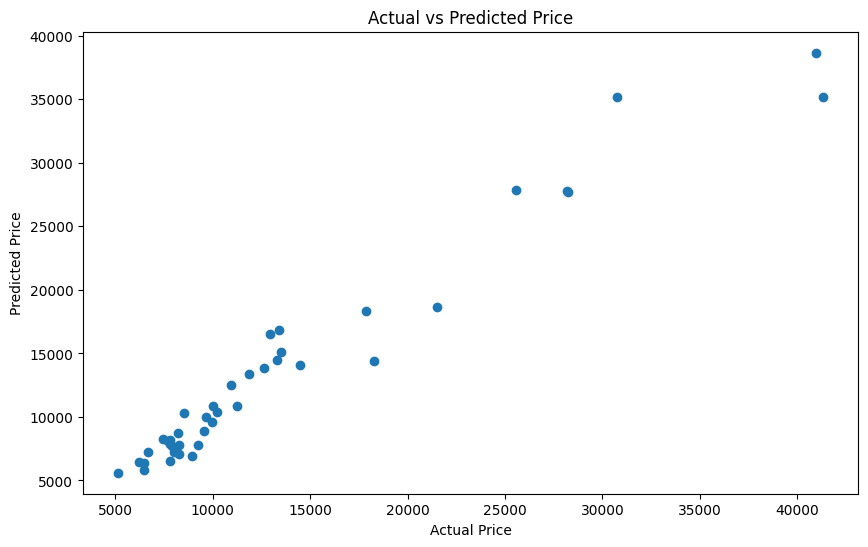

In [107]:
plt.figure(figsize=(10,6))
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Price')
plt.show()

In [115]:
rfr.predict([[i for i in range(1, 190)]])

array([36314.075])

In [116]:
df.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [117]:
df.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000
